In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [62]:
df=pd.read_csv("study_scores.csv")

In [63]:
df.head()

,Hours_Studied,Exam_Score
0,1,17
1,2,22
2,3,31
3,4,39
4,5,47


In [64]:
X=np.array(df[['Hours_Studied']])##Independent Features

In [65]:
Y=np.array(df['Exam_Score'])

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [67]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [68]:
x_test

array([[ 1.24379649],
       [-1.19404463],
       [ 0.19900744]])

In [69]:
x_train

array([[-1.54230764],
       [ 0.89553347],
       [-0.84578161],
       [ 1.5920595 ],
       [-0.14925558],
       [-0.4975186 ],
       [ 0.54727045]])

In [70]:
model=LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [71]:
print(f"Co-efficient={model.coef_}")

Co-efficient=[20.04289197]


In [72]:
print(f"Intercept: {model.intercept_}")
y_pred=model.predict(x_train)

Intercept: 48.714285714285715


Text(0, 0.5, 'Exam Score')

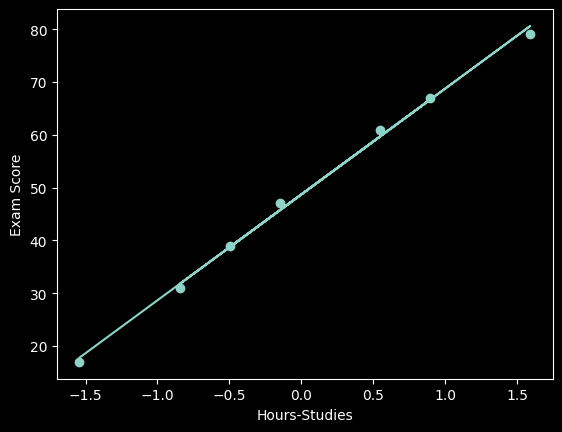

In [73]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred)
plt.xlabel("Hours-Studies")
plt.ylabel("Exam Score")

In [74]:
mse=mean_squared_error(y_train,y_pred)
mae=mean_absolute_error(y_true=y_train,y_pred=y_pred)
rmse=np.sqrt(mse)
r_2=r2_score(y_train,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"Mean Squared Error is {mse}")
print(f"Root mean squared Error is {rmse}")
print(f"R2 Score is {r_2}")

Mean Absolute Error is 0.9108910891089111
Mean Squared Error is 1.057991513437058
Root mean squared Error is 1.0285871443086667
R2 Score is 0.9973732476612072


In [75]:
y_pred=model.predict(x_test)
y_pred

array([73.64356436, 24.78217822, 52.7029703 ])

Text(0, 0.5, 'Exam-score')

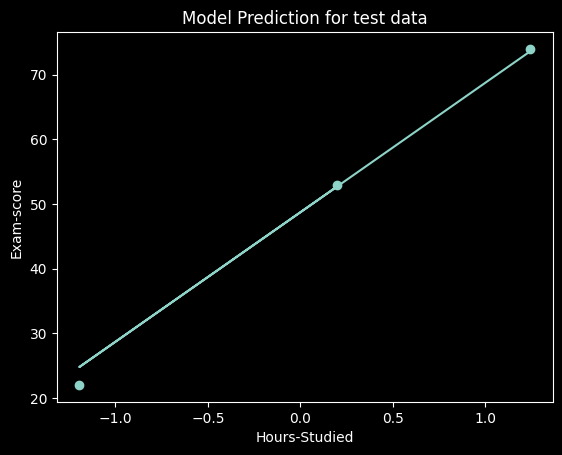

In [76]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)
plt.title("Model Prediction for test data")
plt.xlabel("Hours-Studied")
plt.ylabel("Exam-score")

In [77]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)
r_2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"Mean Squared Error is {mse}")
print(f"Root mean squared Error is {rmse}")
print(f"R2 Score is {r_2}")

Mean Absolute Error is 1.145214521452144
Mean Squared Error is 2.6519295493905783
Root mean squared Error is 1.6284746081503938
R2 Score is 0.9941871977728897


In [78]:
new_model=OLS(x_train,y_train).fit()

In [79]:
y_pred=new_model.predict(x_test)

In [80]:
y_pred

array([ 0.00898075, -0.00862152,  0.00143692])

In [82]:
print(new_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.015
Date:                Fri, 01 Aug 2025   Prob (F-statistic):                       0.353
Time:                        10:03:36   Log-Likelihood:                         -9.3854
No. Observations:                   7   AIC:                                      20.77
Df Residuals:                       6   BIC:                                      20.72
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\aayus\Machine Learning\FeatureEngineering\venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
